The aim of this project is to use historical data loans in order to predict if a borrower will potentially pay back the loan. The data will be explored at the beginning and afterwards we will use tensorflow for the simulation. We will check the success of the system by means of a confusion matrix and a classification report.


The data is from a subset of the LendingClub DataSet and was obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club
        
This exercise is part of the hands-on activity of the awesome online course "Python for Data Science and Machine Learning Bootcamp" from Jose Portilla. I really enjoyed checking the potential applications of the machine learning principles and neural networks in the real life. The fundamentals of this exercise might be potentially interesting for the usual loan activity of the banks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# we will start by reading the file with the loans data that we will work with:

df = pd.read_csv('lending_club_loan_two.csv')

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


There are 27 columns, which means, 27 variables, most of which we don't know their meaning. For this purpose there is the file "lending_club_info.csv". In this file we find the description of all the variables from the file we will work with: "lending_club_loan_two.csv"

Title and purpose seem to be repeated information. We drop the title column

In [4]:
df = df.drop('title',axis=1)

In [5]:
data_info = pd.read_csv('lending_club_info.csv',index_col='LoanStatNew')

In [6]:
data_info

,Description
LoanStatNew,
loan_amnt,The listed amount of the loan applied for by t...
term,The number of payments on the loan. Values are...
int_rate,Interest Rate on the loan
installment,The monthly payment owed by the borrower if th...
grade,LC assigned loan grade
sub_grade,LC assigned loan subgrade
emp_title,The job title supplied by the Borrower when ap...
emp_length,Employment length in years. Possible values ar...
home_ownership,The home ownership status provided by the borr...


In [7]:
# for speeding up the process of finding out the meaning of a variable we can create a function called "feat_info"

def feat_info(col_name):
    print(data_info.loc[col_name]['Description'])

In [8]:
feat_info('loan_status')

Current status of the loan


In [9]:
# let's check percentage of null data for every variable:

null_data = 100 * df.isnull().sum()/len(df)
pd.set_option('display.max_rows',None)
null_data

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

Looks like "mort_acc" has many null data.

In [10]:
feat_info('mort_acc')

Number of mortgage accounts.


In [11]:
df['mort_acc'].value_counts()

0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
23.0         2
32.0         2
26.0         2
31.0         2
30.0         1
28.0         1
34.0         1
Name: mort_acc, dtype: int64

In [12]:
df.corr()['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

The "total_acc" seems to be correlated with "mort_acc". Let's divide the data by groups of "total_account" and calculate the mean of "mort_acc" for every group. We will use these mean values to fill the null_values of "mort_acc"

In [13]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']
total_acc_avg

total_acc
2.0      0.000000
3.0      0.052023
4.0      0.066743
5.0      0.103289
6.0      0.151293
7.0      0.221695
8.0      0.308422
9.0      0.365499
10.0     0.429158
11.0     0.526570
12.0     0.618034
13.0     0.722124
14.0     0.803482
15.0     0.940142
16.0     1.007405
17.0     1.151269
18.0     1.235885
19.0     1.358013
20.0     1.409380
21.0     1.519932
22.0     1.640736
23.0     1.721794
24.0     1.845867
25.0     1.900506
26.0     1.987414
27.0     2.103573
28.0     2.163050
29.0     2.231043
30.0     2.331386
31.0     2.390104
32.0     2.478010
33.0     2.541682
34.0     2.589579
35.0     2.650627
36.0     2.787260
37.0     2.760628
38.0     2.859464
39.0     2.850598
40.0     2.918011
41.0     2.898247
42.0     3.042342
43.0     2.997056
44.0     3.089028
45.0     3.060412
46.0     3.144833
47.0     3.207965
48.0     3.213906
49.0     3.255723
50.0     3.220866
51.0     3.149417
52.0     3.266667
53.0     3.249786
54.0     3.234469
55.0     3.440212
56.0     3.307317


In [14]:
def fill_mort_acc(total_acc,mort_acc):
    '''
    Accepts the total_acc and mort_acc values for the row.
    Checks if the mort_acc is NaN , if so, it returns the avg mort_acc value
    for the corresponding total_acc value for that row.
    
    total_acc_avg here should be a Series or dictionary containing the mapping of the
    groupby averages of mort_acc per total_acc values.
    '''
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [15]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'], x['mort_acc']), axis=1)

In [16]:
# I check there are no more null values in the column "mort_acc"

df.isnull().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                    0
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [17]:
# We just get rid of the other null values and check again that there are no more null values anymore:

df = df.dropna()

df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

Let's check how many loans are fully paid and how many are not paid. The data file does not specify if they were not paid because the payback period is not over yet or they are just non-performing cases. We will assume the second case.

In [18]:
# Number of cases

df['loan_status'].value_counts()

Fully Paid     300624
Charged Off     71537
Name: loan_status, dtype: int64

In [19]:
# Percentage paid and no-paid

100 * df['loan_status'].value_counts()/len(df)

Fully Paid     80.777943
Charged Off    19.222057
Name: loan_status, dtype: float64

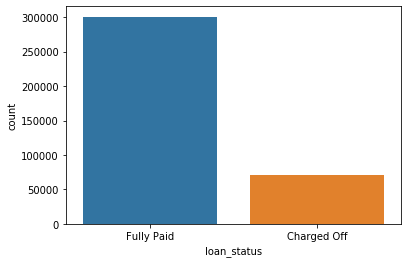

In [20]:
# Graphic paid and no-paid

sns.countplot(x='loan_status',data=df)

(0, 43000)

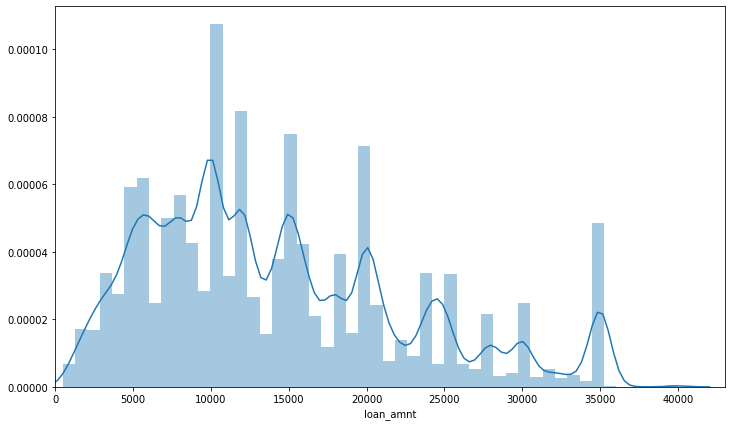

In [21]:
# histogram of the loan amount

plt.figure(figsize=(12,7))
sns.distplot(df['loan_amnt'])
plt.xlim(0,43000)

Correlation of the different variables. I check it numerically and also with a heat map

In [22]:
df.corr()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.174015,0.953106,0.327579,0.042840,0.192262,-0.073596,0.327509,0.098323,0.221257,0.224898,-0.100504
int_rate,0.174015,1.000000,0.166210,-0.058259,0.175482,0.014200,0.059746,-0.010585,0.291417,-0.034028,-0.074405,0.057546
installment,0.953106,0.166210,1.000000,0.321314,0.040120,0.183273,-0.064342,0.315363,0.122332,0.199626,0.196499,-0.093092
annual_inc,0.327579,-0.058259,0.321314,1.000000,-0.174710,0.130666,-0.008348,0.296868,0.025555,0.190959,0.235366,-0.043682
dti,0.042840,0.175482,0.040120,-0.174710,1.000000,0.305891,-0.040843,0.142469,0.193099,0.229373,-0.042134,-0.033670
open_acc,0.192262,0.014200,0.183273,0.130666,0.305891,1.000000,-0.015255,0.219805,-0.131598,0.681134,0.129578,-0.023337
pub_rec,-0.073596,0.059746,-0.064342,-0.008348,-0.040843,-0.015255,1.000000,-0.100712,-0.075251,0.021006,0.015255,0.698453
revol_bal,0.327509,-0.010585,0.315363,0.296868,0.142469,0.219805,-0.100712,1.000000,0.228609,0.192182,0.202611,-0.122581
revol_util,0.098323,0.291417,0.122332,0.025555,0.193099,-0.131598,-0.075251,0.228609,1.000000,-0.102724,0.007571,-0.086041
total_acc,0.221257,-0.034028,0.199626,0.190959,0.229373,0.681134,0.021006,0.192182,-0.102724,1.000000,0.397709,0.043161


(10, 0)

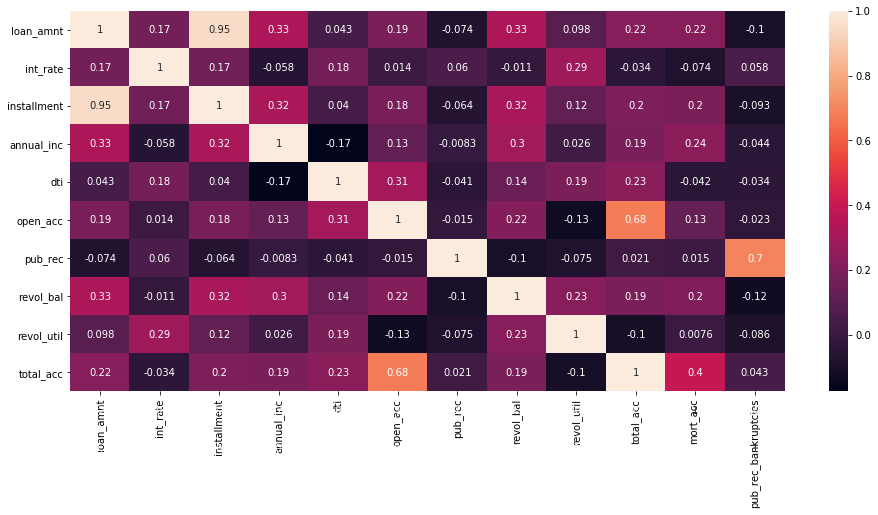

In [23]:
plt.figure(figsize=(16,7))
sns.heatmap(df.corr(),annot=True)
plt.ylim(10, 0)

In [24]:
# Which ones are the best correlated?

df.corr()>0.5

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,True,False,True,False,False,False,False,False,False,False,False,False
int_rate,False,True,False,False,False,False,False,False,False,False,False,False
installment,True,False,True,False,False,False,False,False,False,False,False,False
annual_inc,False,False,False,True,False,False,False,False,False,False,False,False
dti,False,False,False,False,True,False,False,False,False,False,False,False
open_acc,False,False,False,False,False,True,False,False,False,True,False,False
pub_rec,False,False,False,False,False,False,True,False,False,False,False,True
revol_bal,False,False,False,False,False,False,False,True,False,False,False,False
revol_util,False,False,False,False,False,False,False,False,True,False,False,False
total_acc,False,False,False,False,False,True,False,False,False,True,False,False


Best correlated variables:

loan_amnt & installment

pub_rec_bankrupticies & pub_rec

total_acc & open_acc

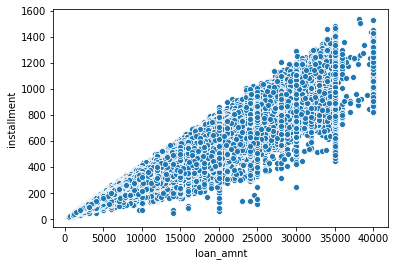

In [25]:
sns.scatterplot(x='loan_amnt',y='installment',data=df)

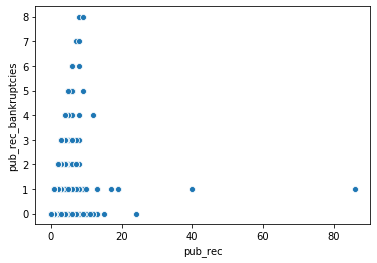

In [26]:
sns.scatterplot(x='pub_rec',y='pub_rec_bankruptcies',data=df)

In [27]:
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


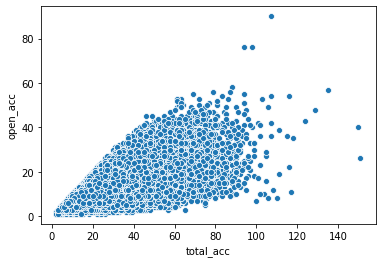

In [28]:
sns.scatterplot(x='total_acc',y='open_acc',data=df)

Boxplot showing the relationship between the loan_status and the Loan Amount and describe the statistics numerically:

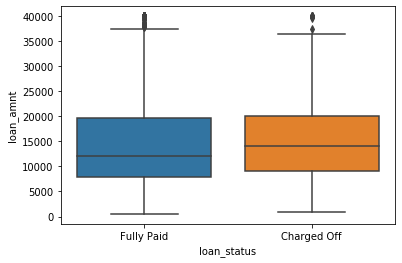

In [29]:
sns.boxplot(x='loan_status',y='loan_amnt',data=df)

In [30]:
df.groupby('loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,71537.0,15385.911486,8495.332940,1000.0,9000.0,14100.0,20000.0,40000.0
Fully Paid,300624.0,13987.096090,8307.096911,500.0,7800.0,12000.0,19700.0,40000.0


Work on the columns "grade" and "subgrade". What do they mean? Can you make some statistical graphs? 

In [31]:
feat_info('grade')

LC assigned loan grade


In [32]:
feat_info('sub_grade')

LC assigned loan subgrade


In [33]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [34]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

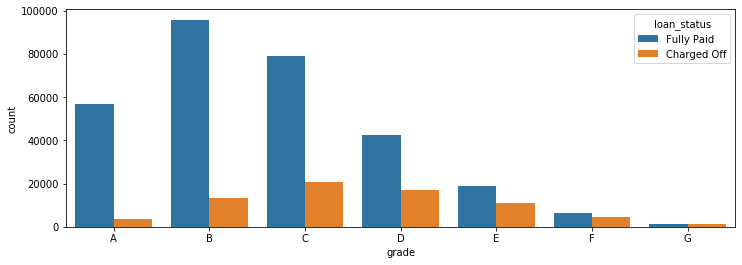

In [35]:
plt.figure(figsize=(12,4))
sns.countplot(x='grade',data=df,hue='loan_status',order=['A','B','C','D','E','F','G'])

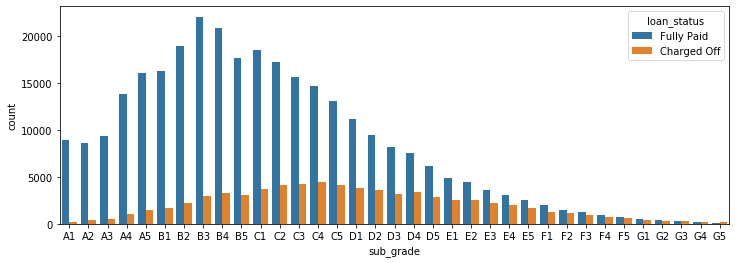

In [36]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(x='sub_grade',data=df,order = subgrade_order,hue='loan_status')

According to the results, looks like the grades "E,F,G" are the most riskie ones, with less probabilitie to be paid back. I isolate them:

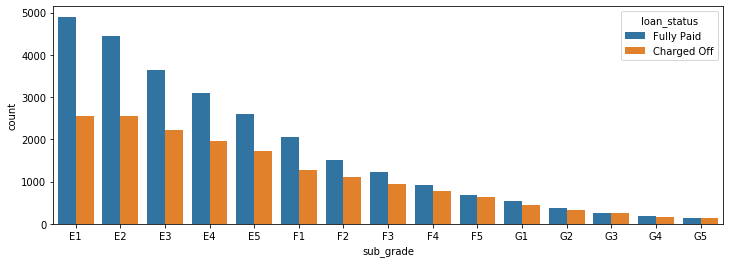

In [37]:
e_f_g = df[(df['grade']=='E') | (df['grade']=='F') | (df['grade']=='G')]

plt.figure(figsize=(12,4))
subgrade_order = sorted(e_f_g['sub_grade'].unique())
sns.countplot(x='sub_grade',data=e_f_g,order = subgrade_order,hue='loan_status')

Work on the columns "empt_title" and "emp_length". Is it worth it to keep them?

In [38]:
feat_info('emp_title')
print('\n')
feat_info('emp_length')

The job title supplied by the Borrower when applying for the loan.*


Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 


In [39]:
df['emp_title'].nunique()

172566

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372161 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             372161 non-null  float64
 1   term                  372161 non-null  object 
 2   int_rate              372161 non-null  float64
 3   installment           372161 non-null  float64
 4   grade                 372161 non-null  object 
 5   sub_grade             372161 non-null  object 
 6   emp_title             372161 non-null  object 
 7   emp_length            372161 non-null  object 
 8   home_ownership        372161 non-null  object 
 9   annual_inc            372161 non-null  float64
 10  verification_status   372161 non-null  object 
 11  issue_d               372161 non-null  object 
 12  loan_status           372161 non-null  object 
 13  purpose               372161 non-null  object 
 14  dti                   372161 non-null  float64
 15  

this means, there are 396030 lines, and 173105 different "emp_titles", which means, this column is not really giving us much information for training the data with our algorithm. Therefore, we better delete this column

In [41]:
df = df.drop('emp_title',axis=1)

In [42]:
pd.set_option('display.max_columns', None)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


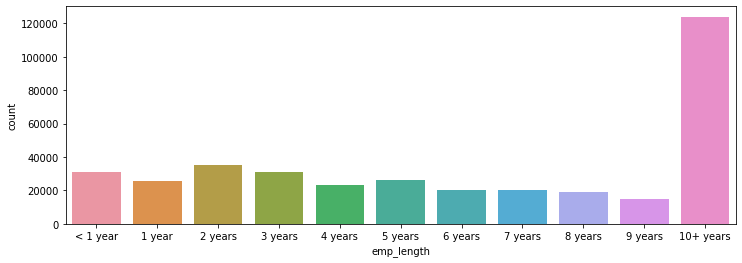

In [43]:
# Now we check how many cases are there for every case of employment length:

plt.figure(figsize=(12,4))

order_years = [ '< 1 year','1 year','2 years','3 years','4 years','5 years','6 years','7 years','8 years','9 years','10+ years']

sns.countplot(x='emp_length',data=df,order=order_years)

I plot out the countplot of employment length with a hue separating Fully Paid vs Charged Off

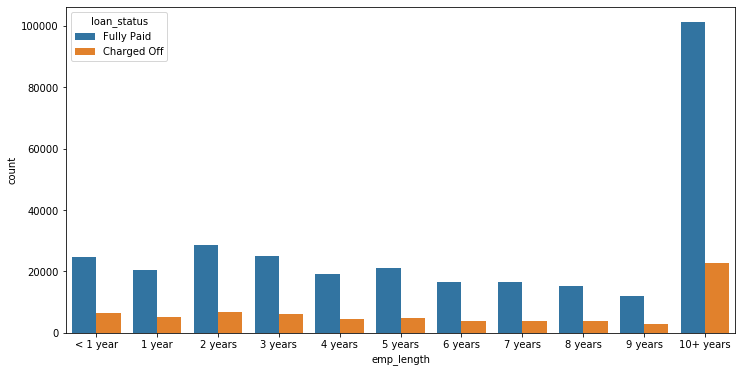

In [44]:
plt.figure(figsize=(12,6))

sns.countplot(x='emp_length',data=df,order=order_years,hue='loan_status')

This graph does actually not give us the information we are interested in: What percentaje of people does not pay the loan back for every category of employement length. We will work on this now:

In [45]:
emp_co = df[df['loan_status']=="Charged Off"].groupby("emp_length").count()['loan_status']
emp_fp = df[df['loan_status']=="Fully Paid"].groupby("emp_length").count()['loan_status']

emp_len = emp_co/emp_fp

emp_len

emp_length
1 year       0.248220
10+ years    0.225802
2 years      0.239494
3 years      0.242510
4 years      0.237465
5 years      0.237494
6 years      0.233531
7 years      0.241584
8 years      0.248993
9 years      0.251487
< 1 year     0.260780
Name: loan_status, dtype: float64

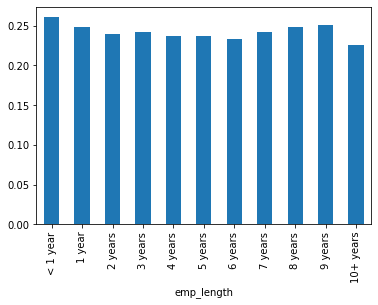

In [46]:
emp_len.loc[order_years].plot(kind='bar')

The chances are however almost indentical. Therefore, I delete this columns, since it seems that it is not giving us relevant information

In [47]:
df = df.drop('emp_length',axis=1)

In [48]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


We have several variables that should be converted into values: "term", "grade", "sub_grade", "home_ownership", "verification_status", "issue_d","loan_status","purpose" 

In [49]:
df['term'].value_counts()

 36 months    281537
 60 months     90624
Name: term, dtype: int64

In [50]:
# For "term" we get rid of the term "months" so that it becomes a numeric feature

df['term'] = df['term'].apply(lambda term: int(term[:3]))

In [51]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,B,B4,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36,11.99,265.68,B,B5,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36,10.49,506.97,B,B3,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36,6.49,220.65,A,A2,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60,17.27,609.33,C,C5,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


grade is part of subgrade. We drop "grade"

In [52]:
df = df.drop('grade',axis=1)

In [53]:
# We convert subgrade into dummies variables. First we create the dummy variables

subgrade_dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

# And now we concadenate the dummy variables with df, dropping "sub_grade" before

df = pd.concat([df.drop('sub_grade',axis=1),subgrade_dummies],axis=1) 

In [54]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
# We check which features are not numeric yet:

df.select_dtypes(['object']).columns

Index(['home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

I convert these columns: ['verification_status', 'application_type','initial_list_status','purpose'] into dummy variables

In [56]:
dummies = pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose' ]],drop_first=True)
df = df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [57]:
df.head()

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,issue_d,loan_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,address,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10000.0,36,11.44,329.48,RENT,117000.0,Jan-2015,Fully Paid,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Jan-2015,Fully Paid,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Jan-2015,Fully Paid,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Nov-2014,Fully Paid,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Apr-2013,Charged Off,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
# Next variable "home ownership", we check what are the values

df['home_ownership'].value_counts()

MORTGAGE    187021
RENT        151278
OWN          33728
OTHER          105
NONE            28
ANY              1
Name: home_ownership, dtype: int64

In [59]:
# We convert it into dummy variables too. "NONE" and "ANY" can be changed into "OTHER"

df['home_ownership']=df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

dummies = pd.get_dummies(df['home_ownership'],drop_first=True)
df = df.drop('home_ownership',axis=1)
df = pd.concat([df,dummies],axis=1)

In [60]:
# Address: we extract the zip code and then convert it to dummy variables:


df['zip_code'] = df['address'].apply(lambda address:address[-5:])

In [61]:
dummies = pd.get_dummies(df['zip_code'],drop_first=True)
df = df.drop(['zip_code','address'],axis=1)
df = pd.concat([df,dummies],axis=1)

In [62]:
feat_info('issue_d')

The month which the loan was funded


In [63]:
# we delete it:

df = df.drop('issue_d',axis=1)

In [64]:
# from "earliest_cr_line" we keep only the year, calling it "earliest_cr_year"

df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [65]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year
0,10000.0,36,11.44,329.48,117000.0,Fully Paid,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1990
1,8000.0,36,11.99,265.68,65000.0,Fully Paid,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2004
2,15600.0,36,10.49,506.97,43057.0,Fully Paid,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2007
3,7200.0,36,6.49,220.65,54000.0,Fully Paid,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2006
4,24375.0,60,17.27,609.33,55000.0,Charged Off,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1999


For "loan_status" there are only two possibilities: Fully Paid or Charged Off. Therefore, instead of creating dummy variables, we will create a zero-one column called "loan_repaid" and then we delete "loan_status"

In [69]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})  

df = df.drop('loan_status',axis=1)

In [70]:
df.head()

,loan_amnt,term,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,initial_list_status_w,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,OTHER,OWN,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700,earliest_cr_year,loan_repaid
0,10000.0,36,11.44,329.48,117000.0,26.24,16.0,0.0,36369.0,41.8,25.0,0.0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1990,1
1,8000.0,36,11.99,265.68,65000.0,22.05,17.0,0.0,20131.0,53.3,27.0,3.0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2004,1
2,15600.0,36,10.49,506.97,43057.0,12.79,13.0,0.0,11987.0,92.2,26.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,2007,1
3,7200.0,36,6.49,220.65,54000.0,2.60,6.0,0.0,5472.0,21.5,13.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2006,1
4,24375.0,60,17.27,609.33,55000.0,33.95,13.0,0.0,24584.0,69.8,43.0,1.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1999,0


And now, they are all numeric features, which means, we can start to create our model

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
# the variable that we want to predict is obviously "loan_repaid", which means, if the loan was repaid or not

X = df.drop('loan_repaid',axis=1).values
y = df['loan_repaid'].values

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

I normalize the data:

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [78]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm

In [79]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw


# input layer
model.add(Dense(78,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(19, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1,activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam')

In [80]:
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test, y_test))

Train on 260512 samples, validate on 111649 samples
Epoch 1/25
260512/260512 [==============================] - 10s 39us/sample - loss: 0.3041 - val_loss: 0.2585
Epoch 2/25
260512/260512 [==============================] - 8s 30us/sample - loss: 0.2633 - val_loss: 0.2561
Epoch 3/25
260512/260512 [==============================] - 8s 29us/sample - loss: 0.2597 - val_loss: 0.2559
Epoch 4/25
260512/260512 [==============================] - 8s 29us/sample - loss: 0.2578 - val_loss: 0.2554
Epoch 5/25
260512/260512 [==============================] - 8s 30us/sample - loss: 0.2566 - val_loss: 0.2553
Epoch 6/25
260512/260512 [==============================] - 8s 30us/sample - loss: 0.2557 - val_loss: 0.2556
Epoch 7/25
260512/260512 [==============================] - 8s 30us/sample - loss: 0.2554 - val_loss: 0.2554
Epoch 8/25
260512/260512 [==============================] - 8s 30us/sample - loss: 0.2550 - val_loss: 0.2550
Epoch 9/25
260512/260512 [==============================] - 8s 30us/sample 

We evaluate now out model:

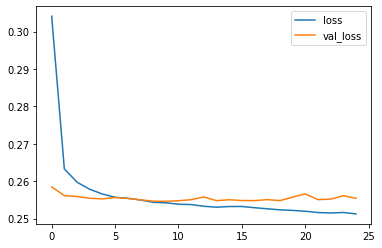

In [81]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

In [82]:
from sklearn.metrics import classification_report,confusion_matrix

In [83]:
predictions = model.predict_classes(X_test)

In [84]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.45      0.61     21449
           1       0.88      1.00      0.94     90200

    accuracy                           0.89    111649
   macro avg       0.93      0.72      0.77    111649
weighted avg       0.90      0.89      0.87    111649



In [85]:
confusion_matrix(y_test,predictions)

array([[ 9572, 11877],
       [  316, 89884]])

With a random customer, we check if we would give him a loan. Python random.seed() initializes the pseudo-random number generator. The randint() method returns an integer number selected element from the specified range.


In [89]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))

# We fill all the values with the function random_in. Obviously we exclude the column "loan_repaid", because this 
# is supposed to be the result of our model, the value we have to predict

new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt                               25000.00
term                                       36.00
int_rate                                   15.80
installment                               876.46
annual_inc                             105740.00
dti                                        10.74
open_acc                                    8.00
pub_rec                                     0.00
revol_bal                               17773.00
revol_util                                 83.80
total_acc                                  11.00
mort_acc                                    0.00
pub_rec_bankruptcies                        0.00
A2                                          0.00
A3                                          0.00
A4                                          0.00
A5                                          0.00
B1                                          0.00
B2                                          0.00
B3                                          0.00
B4                  

In [90]:
model.predict_classes(new_customer.values.reshape(1,78))

array([[1]], dtype=int32)

In [91]:
df.iloc[random_ind]['loan_repaid']

1.0

the value is 1 -----> The person would potentially pay back the loan